# Group project team 9

Team 9:
Aisha Bashirova,
Carlos Correa,
Carlos Fevreiski,
Chainthanya Nair,
Danielle Metsoko,
Derlin German

# 1. LIBRARIES & INITIAL SETUP

Importing the datasets and the needed libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df_items        = pd.read_pickle('items.pickle')
df_restaurants  = pd.read_pickle('restaurants.pickle')
df_orders_7       = pd.read_pickle('orders_7.pickle')   # ~2M rows (large document)
df_orders      = pd.read_pickle('orders.pickle')        # ~2M rows (large document)
df_summary      = pd.read_pickle('summarized_orders.pickle')

#We want to know more information of the datasets with shape function
print("Items:",       df_items.shape)
print("Restaurants:", df_restaurants.shape)
print("Orders_7:",      df_orders_7.shape)
print("Orders:",      df_orders.shape)
print("Summary:",     df_summary.shape)

Items: (31, 3)
Restaurants: (8, 7)
Orders_7: (2387224, 15)
Orders: (2387224, 10)
Summary: (2806, 4)


In [ ]:
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [ ]:
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


In [ ]:
df_orders_7.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [ ]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [ ]:
df_summary.head()

,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ITEM_ID    31 non-null     object
 1   ITEM_NAME  31 non-null     object
 2   ITEM_TYPE  31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [ ]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RESTAURANT_ID   8 non-null      object 
 1   NAME            8 non-null      object 
 2   ADDRESS         8 non-null      object 
 3   LAT             8 non-null      float64
 4   LONG            8 non-null      float64
 5   OPENING_DATE    8 non-null      object 
 6   DELIVERY_START  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 580.0+ bytes


In [ ]:
df_orders_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2387224 entries, 0 to 2387223
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   RESTAURANT_ID    object        
 3   TYPE             object        
 4   DRINKS           float64       
 5   COOKIES          float64       
 6   MAIN             object        
 7   BASE             object        
 8   SIDE_1           object        
 9   SIDE_2           object        
 10  RESTAURANT_NAME  object        
 11  MAIN_NAME        object        
 12  BASE_NAME        object        
 13  SIDE_1_NAME      object        
 14  SIDE_2_NAME      object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 291.4+ MB


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ORDER_ID       object        
 1   DATETIME       datetime64[ns]
 2   RESTAURANT_ID  object        
 3   TYPE           object        
 4   DRINKS         float64       
 5   COOKIES        float64       
 6   MAIN           object        
 7   BASE           object        
 8   SIDE_1         object        
 9   SIDE_2         object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 182.1+ MB


In [ ]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   RESTAURANT_NAME  2806 non-null   object        
 1   DATE             2806 non-null   datetime64[ns]
 2   NUM_ORDERS       2806 non-null   int64         
 3   PERC_DELIVERY    2806 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 87.8+ KB


#2. DATA CLEANING AND PRE-PROCESSING

We check for null values across all dataframes

In [ ]:
# Open AI, 2025
# prompt: generate a code that will go through the data frames, and make sure that there are no null values


def check_nulls(df, df_name):
  """
  Checks for null values in a DataFrame and prints a summary.

  Args:
    df: The pandas DataFrame to check.
    df_name: The name of the DataFrame (for printing purposes).
  """
  print('')
  null_counts = df.isnull().sum()
  if null_counts.sum() > 0:
    print(f"Null values found in DataFrame '{df_name}':")
    print(null_counts[null_counts > 0])
  else:
    print(f"No null values found in DataFrame '{df_name}'.")



# Check each DataFrame for null values
check_nulls(df_items, "items")
check_nulls(df_orders_7, "orders_7")
check_nulls(df_orders, "orders")
check_nulls(df_restaurants, "restaurants")
check_nulls(df_summary, "summarized")



No null values found in DataFrame 'items'.

Null values found in DataFrame 'orders_7':
MAIN           111585
BASE           111585
SIDE_1         111585
SIDE_2         111585
MAIN_NAME      111585
BASE_NAME      111585
SIDE_1_NAME    111585
SIDE_2_NAME    111585
dtype: int64

Null values found in DataFrame 'orders':
MAIN      111585
BASE      111585
SIDE_1    111585
SIDE_2    111585
dtype: int64

No null values found in DataFrame 'restaurants'.

No null values found in DataFrame 'summarized'.


We can appreciate that there are 111,585 null values, after analyzing the rows that contain nulls, we determined that it is important to exclude the rows that do not contain any values for any item, but keep the ones that have 'COOKIES' or 'DRINKS'.

Since we have the same values in most dataframes, and the null values in orders & orders_7 are the same, we decided to do our analysis from orders_7 and merge it with restaurants to get the "LAT" & "LONG" for each restaurants in case we need to plot a map. But first we eliminate the rows that do not have any orders in them and drop the duplicated columns.

In [ ]:
df_orders_7.duplicated().sum()

np.int64(0)

In [ ]:
df_orders_7 = df_orders_7.drop(
    df_orders_7[
        df_orders_7[['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']].isnull().all(axis=1) &
        (df_orders_7['DRINKS'] == 0) &
        (df_orders_7['COOKIES'] == 0)
    ].index
)
df_orders_7.shape

(2338119, 15)

In [ ]:
df_orders_7.drop(columns=['MAIN', 'BASE', 'SIDE_1', 'SIDE_2'], inplace=True)

Now we add a column to highlight orders that only have 'COOKIES' &/or 'DRINKS'

In [ ]:
df_orders_7['FOOD_ORDER'] = df_orders_7[['MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME' ]].notna().any(axis=1)

In [ ]:
df_orders_7.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,FOOD_ORDER
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,Midtown,NaN,NaN,NaN,NaN,False
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,True
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,True
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,True
5,O1026484,2018-06-02 14:32:53,R10008,DELIVERY,1.0,0.0,Williamsburg,NaN,NaN,NaN,NaN,False


Now we separate 'DATE' & 'TIME' from 'DATETIME' to analyze them separetely

In [ ]:
df_orders_7['DATE'] = df_orders_7['DATETIME'].dt.date
df_orders_7['TIME'] = df_orders_7['DATETIME'].dt.time
df_orders_7.drop(columns=['DATETIME'], inplace=True)
df_orders_7.head()

,ORDER_ID,RESTAURANT_ID,TYPE,DRINKS,COOKIES,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,FOOD_ORDER,DATE,TIME
0,O1820060,R10002,IN_STORE,1.0,2.0,Midtown,NaN,NaN,NaN,NaN,False,2018-10-11,17:25:50
2,O752854,R10001,DELIVERY,0.0,2.0,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,True,2018-04-21,18:12:57
3,O2076864,R10005,PICKUP,1.0,0.0,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,True,2018-11-17,12:50:52
4,O1988898,R10008,IN_STORE,0.0,0.0,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,True,2018-11-04,18:37:24
5,O1026484,R10008,DELIVERY,1.0,0.0,Williamsburg,NaN,NaN,NaN,NaN,False,2018-06-02,14:32:53


In [ ]:
df_orders_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338119 entries, 0 to 2387223
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ORDER_ID         object 
 1   RESTAURANT_ID    object 
 2   TYPE             object 
 3   DRINKS           float64
 4   COOKIES          float64
 5   RESTAURANT_NAME  object 
 6   MAIN_NAME        object 
 7   BASE_NAME        object 
 8   SIDE_1_NAME      object 
 9   SIDE_2_NAME      object 
 10  FOOD_ORDER       bool   
 11  DATE             object 
 12  TIME             object 
dtypes: bool(1), float64(2), object(10)
memory usage: 234.1+ MB


Now we have to change the Dtype for 'DATE' & 'TIME' from object to Datetime

In [ ]:
#Change the variable type for 'DATE' & 'TIME'
df_orders_7['DATE'] = pd.to_datetime(df_orders_7['DATE']).dt.normalize()
df_orders_7['TIME'] = pd.to_datetime(df_orders_7['TIME'], format='%H:%M:%S', errors='coerce')
df_orders_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338119 entries, 0 to 2387223
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   RESTAURANT_ID    object        
 2   TYPE             object        
 3   DRINKS           float64       
 4   COOKIES          float64       
 5   RESTAURANT_NAME  object        
 6   MAIN_NAME        object        
 7   BASE_NAME        object        
 8   SIDE_1_NAME      object        
 9   SIDE_2_NAME      object        
 10  FOOD_ORDER       bool          
 11  DATE             datetime64[ns]
 12  TIME             datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), object(8)
memory usage: 234.1+ MB


We merge the orders_7 & restaurants datasets to iclude Latitude and Longitud for each restaurant. This will help us plot a heat map.

In [ ]:
df_orders_7 = pd.merge(df_orders_7, df_restaurants[['RESTAURANT_ID', 'LAT', 'LONG']], on='RESTAURANT_ID', how='left')

print(df_orders_7.info())
df_orders_7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338119 entries, 0 to 2338118
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   RESTAURANT_ID    object        
 2   TYPE             object        
 3   DRINKS           float64       
 4   COOKIES          float64       
 5   RESTAURANT_NAME  object        
 6   MAIN_NAME        object        
 7   BASE_NAME        object        
 8   SIDE_1_NAME      object        
 9   SIDE_2_NAME      object        
 10  FOOD_ORDER       bool          
 11  DATE             datetime64[ns]
 12  TIME             datetime64[ns]
 13  LAT              float64       
 14  LONG             float64       
dtypes: bool(1), datetime64[ns](2), float64(4), object(8)
memory usage: 252.0+ MB
None


,ORDER_ID,RESTAURANT_ID,TYPE,DRINKS,COOKIES,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,FOOD_ORDER,DATE,TIME,LAT,LONG
0,O1820060,R10002,IN_STORE,1.0,2.0,Midtown,NaN,NaN,NaN,NaN,False,2018-10-11,1900-01-01 17:25:50,40.763640,-73.977960
1,O752854,R10001,DELIVERY,0.0,2.0,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,True,2018-04-21,1900-01-01 18:12:57,40.811470,-73.961230
2,O2076864,R10005,PICKUP,1.0,0.0,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,True,2018-11-17,1900-01-01 12:50:52,40.743600,-73.991070
3,O1988898,R10008,IN_STORE,0.0,0.0,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,True,2018-11-04,1900-01-01 18:37:24,40.713749,-73.965782
4,O1026484,R10008,DELIVERY,1.0,0.0,Williamsburg,NaN,NaN,NaN,NaN,False,2018-06-02,1900-01-01 14:32:53,40.713749,-73.965782


Now that the data has been cleaned and pre-processed we can start with our exploratory data analysis.

#3. EXPLORATORY DATA ANALYSIS

##3.1 ANALYZING EXTRA ITEMS ('COOKIES', 'DRINKS')

We start by creating a simple visualization for each numeric variable.

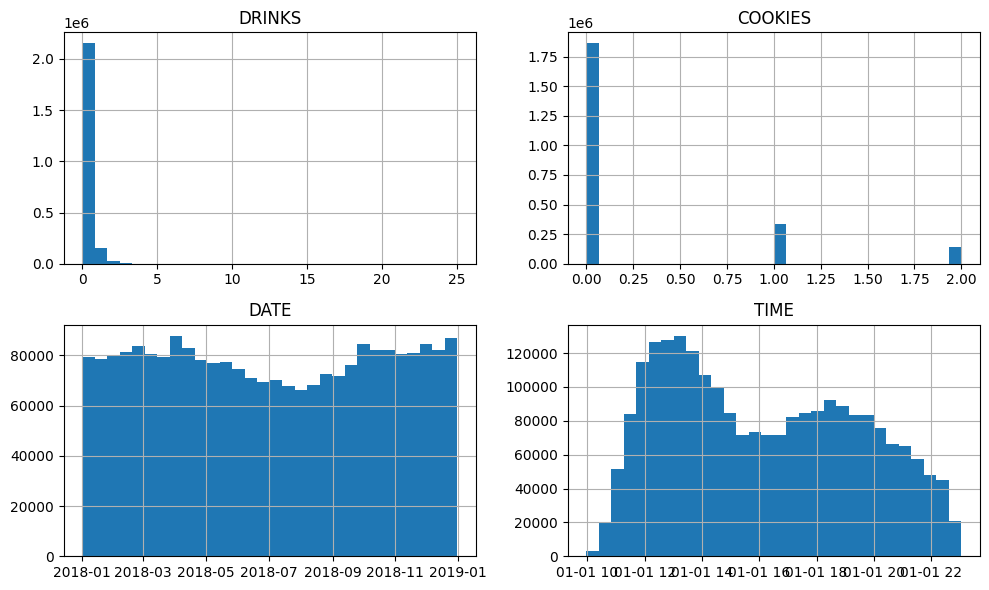

In [ ]:
df_orders_7[['DRINKS', 'COOKIES', 'DATE', 'TIME']].hist(figsize=(10, 6), bins=30, ec='black')

plt.tight_layout()
plt.show()

In this step, we calculate the 95th percentile for the COOKIES and DRINKS columns and filter out orders that exceed those thresholds to retain the bottom 95% of the data. We then generate histograms using only that subset, excluding outliers to clearly show the central distribution of drink and cookie sales.

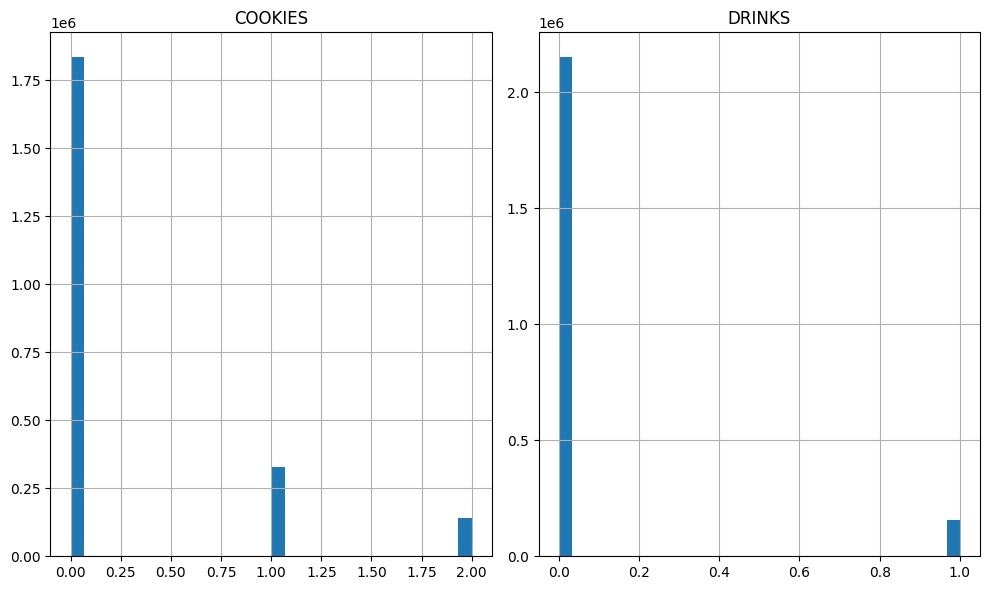

In [ ]:
# Filtering for 'cookies' and 'drinks' columns in df_orders_7
filter_cutoff = 0.95

# Assuming 'cookies' and 'drinks' are column names in df_orders_7
# You might need to adjust these column names based on your actual data
filter_cookies = df_orders_7['COOKIES'] <= df_orders_7['COOKIES'].quantile(filter_cutoff)
filter_drinks = df_orders_7['DRINKS'] <= df_orders_7['DRINKS'].quantile(filter_cutoff)

# Combine the filters
filter_exclude_top_percent_cookies_drinks = filter_cookies & filter_drinks

# Create histograms for 'cookies' and 'drinks' based on the filter
df_orders_7[filter_exclude_top_percent_cookies_drinks][['COOKIES', 'DRINKS']].hist(figsize=(10,6), bins=30, ec='black')

plt.tight_layout()


We can see that the vast majority of orders do not include any 'DRINKS' or 'COOKIES', we calculate the % of orders that include either 'COOOKIES' and/or 'DRINKS'

In [ ]:
df_orders_7['DRINKS'].describe()

,DRINKS
count,2.338119e+06
mean,9.851680e-02
std,3.871501e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.500000e+01


In [ ]:
df_orders_7['COOKIES'].describe()

,COOKIES
count,2.338119e+06
mean,2.648822e-01
std,5.629258e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.000000e+00


Now we want to know which restaurant sells the most and least extra items.

In [ ]:
#(OpenAI, 2025)
upsell_by_rest = (
    df_orders_7
      .groupby('RESTAURANT_ID')
      .agg(
        pct_drinks = ('DRINKS', lambda s: (s>0).mean()*100),
        pct_cookies = ('COOKIES', lambda s: (s>0).mean()*100)
      )
      .reset_index()
      .merge(df_restaurants[['RESTAURANT_ID','NAME']], on='RESTAURANT_ID')
)
display(upsell_by_rest.sort_values('pct_drinks', ascending=False))

,RESTAURANT_ID,pct_drinks,pct_cookies,NAME
1,R10002,10.455675,20.451722,Midtown
5,R10006,9.777322,20.277103,Upper East Side
2,R10003,8.179810,20.518207,Bryant Park
4,R10005,8.062642,20.332321,Flatiron
6,R10007,8.047659,20.425461,Upper West Side
7,R10008,8.023107,20.367371,Williamsburg
3,R10004,6.330770,20.342217,NYU
0,R10001,5.555691,20.357154,Columbia


In [ ]:
pct_drinks = (df_orders_7['DRINKS'] > 0).mean() * 100
pct_cookies = (df_orders_7['COOKIES'] > 0).mean() * 100
print(f"{pct_drinks:.1f}% of orders include drinks")
print(f"{pct_cookies:.1f}% of orders include cookies")

8.0% of orders include drinks
20.4% of orders include cookies


###3.1.1 INSIGHTS FOR EXTRA ITEMS

Cookie orders hover around 20% across all locations, but beverage orders vary widely, from 5.4% at Columbia to 10.3% at Midtown. This suggests that if we at Columbia and NYU apply the  tactics as Midtown maybe as combo packs, special pricing we could increase beverage sales by several percentage points, thus boosting the average ticket and revenue.
It is also very interesting that only 8.0% of orders contain a drink, perhaps this is because most orders are deliveries or pick-ups, we test our hypothesis in the next chapter.

##3.2 POPULARITY OF EACH ITEM AND RESTAURANT


###3.2.1 TOP PERFORMING RESTAURANTS BY NUMBER OF ORDERS.

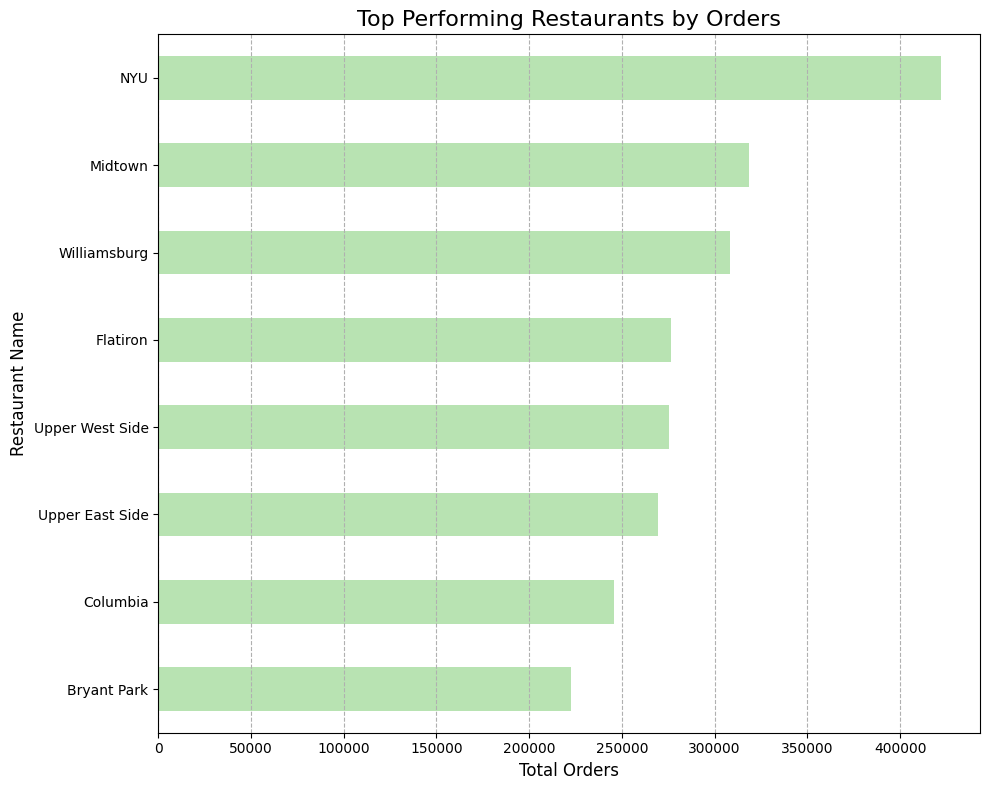

In [ ]:
top_10_restaurants = df_orders_7['RESTAURANT_NAME'].value_counts().head(10)

colors = plt.cm.Greens(np.linspace(0.7, 0.3, len(df_orders_7['RESTAURANT_NAME'])))

plt.figure(figsize=(10, 8))  # Increased figure size
top_10_restaurants.sort_values(ascending=True).plot(kind='barh', color=colors[::-1]) # Use horizontal bar chart for better readability of labels

plt.title("Top Performing Restaurants by Orders", fontsize=16)
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Restaurant Name", fontsize=12)

plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

NYU leads with approximately 420,000 requests, followed by Midtown with 320,000 and Williamsburg with 310,000, while Columbia and Bryant Park register 250,000 and 230,000; this indicates that locations near campuses and office districts concentrate the greatest demand.

### 3.2.2 Most ordered 'MAIN' by number of orders

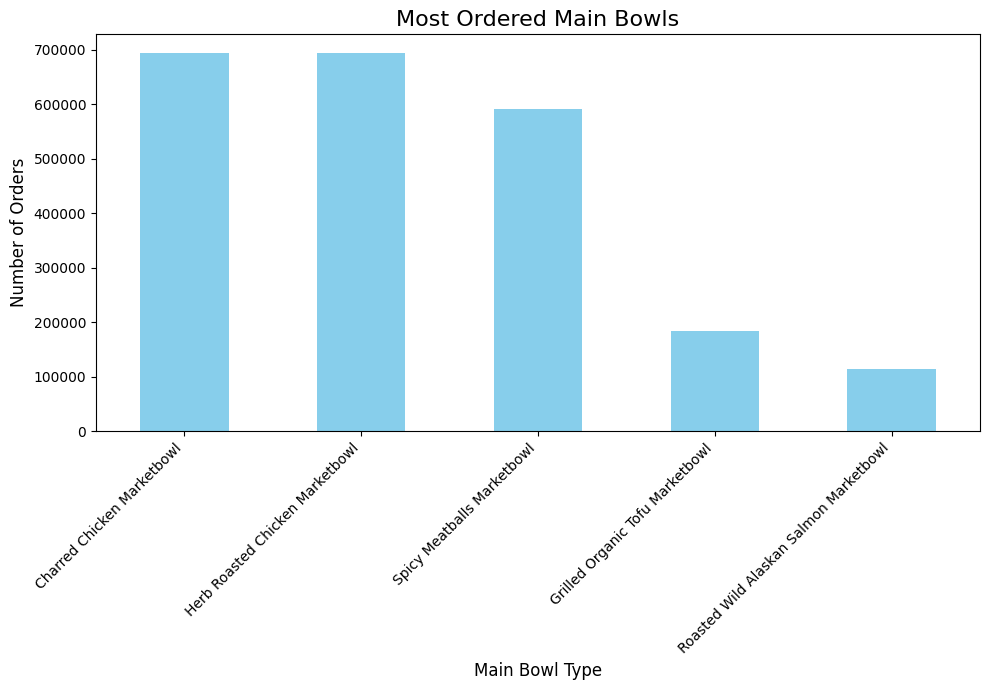

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df_orders_7.MAIN_NAME.value_counts().plot(kind='bar', ax=ax, color='skyblue')
plt.title("Most Ordered Main Bowls", fontsize=16)
plt.xlabel("Main Bowl Type", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart shows the most-ordered 'MAIN', with Charred Chicken and Herb Roasted Chicken leading the list, followed by Spicy Meatballs, indicating that these options are customer favorites and a good focus for promotions or menu developments.

Now lets see how many 'MAIN' are sold per restaurant

In [ ]:
# Analyze restaurant performance - Main Dishes
main_dish_performance = (
    df_orders_7.groupby('RESTAURANT_NAME')['MAIN_NAME'].count()
    .reset_index(name='Total Main Dishes') # Combine count and rename
    .sort_values(by='Total Main Dishes', ascending=False)
)

# Add rank column
main_dish_performance.insert(0, 'Rank', range(1, len(main_dish_performance) + 1))

main_dish_performance = main_dish_performance.set_index('Rank')
print("\nRestaurant Ranking based on Total Main Dish Sales (Rank as index):\n", main_dish_performance.head(10))


Restaurant Ranking based on Total Main Dish Sales (Rank as index):
       RESTAURANT_NAME  Total Main Dishes
Rank                                    
1                 NYU             411253
2             Midtown             309502
3        Williamsburg             299822
4            Flatiron             268909
5     Upper West Side             268023
6     Upper East Side             261957
7            Columbia             239406
8         Bryant Park             216767


###3.3.3 HEATMAP AND MARKERS FOR EACH RESTAURANT.

In [ ]:
# 6.4 Heatmap and Markers per Restaurant
import folium
from folium.plugins import HeatMap

# 6.4.1 Aggregate order counts per restaurant
df_counts = (
    df_orders_7
      .groupby(['RESTAURANT_ID', 'RESTAURANT_NAME', 'LAT', 'LONG'])
      .agg(ORDERS=('ORDER_ID', 'nunique'))
      .reset_index()
)
# What: group by restaurant with coordinates
# Why: we already have merged data in df_orders_7

# 6.4.2 Create base map centered on NYC
map_nyc = folium.Map(location=[40.75, -73.98], zoom_start=12)

# 6.4.3 Add HeatMap layer
heat_data = df_counts[['LAT', 'LONG', 'ORDERS']].values.tolist()
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(map_nyc)

# 6.4.4 Add restaurant markers
for _, row in df_counts.iterrows():
    folium.Marker(
        location=[row.LAT, row.LONG],
        popup=f"{row.RESTAURANT_NAME}: {row.ORDERS} orders",
        tooltip=row.RESTAURANT_NAME
    ).add_to(map_nyc)

# 6.4.5 Display the interactive map
map_nyc


###3.3.4 INSIGHTS

The heat map reveals two areas of highest order concentration: the NYU area and Midtown, where the color intensity is highest, indicating over 400,000 and 320,000 orders, respectively. The markers confirm these values, showing that Williamsburg and Flatiron also have high volumes (around 300,000 and 276,000), while Columbia and Bryant Park have lower densities (250,000 and 223,000). Taken together, this suggests that restaurants near large campuses and office districts attract the most demand.

#4. TEMPORAL ANALYSIS (SEASONALITY)

Find out which periods (day, week, month, or season) and what hours we record sales peaks and valleys to fine-tune promotions.

##4.1 SEASONAL TRENDS

###4.1.1 TOTAL

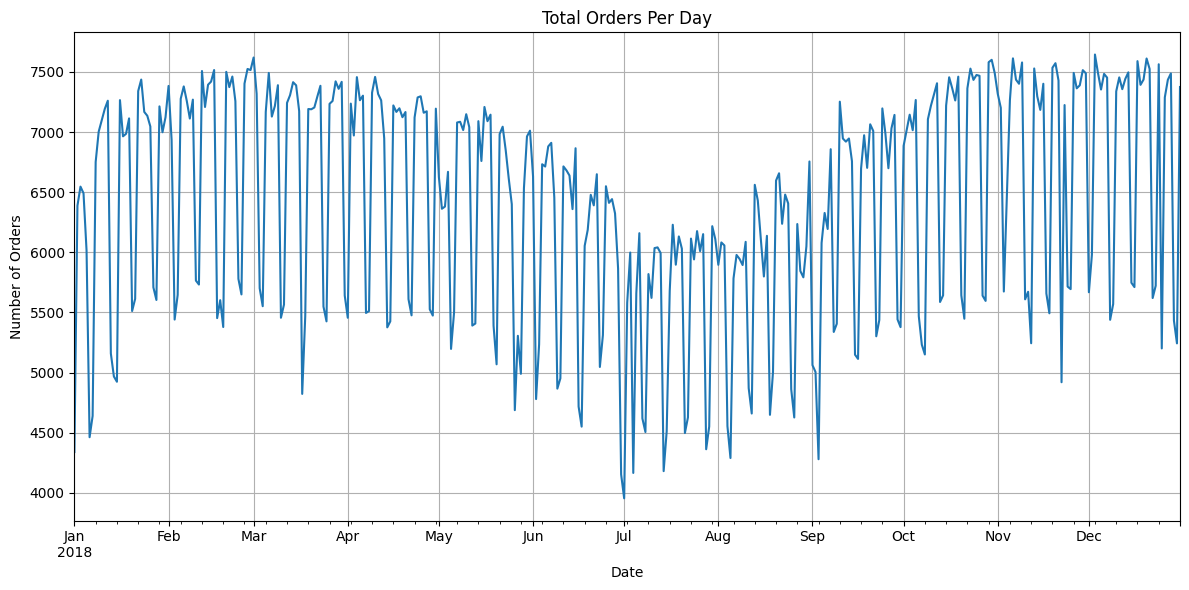

In [ ]:
# Group by date and count the number of orders
daily_orders = df_orders_7.groupby('DATE').size()

# Create the line chart
plt.figure(figsize=(12, 6))
daily_orders.plot(kind='line')
plt.title('Total Orders Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

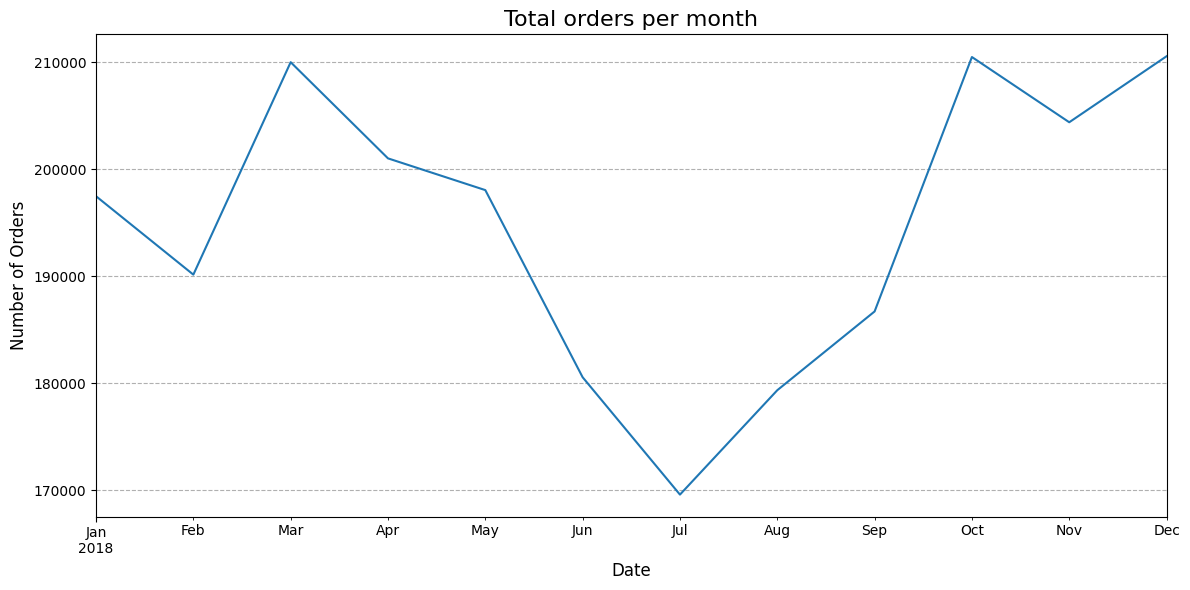

In [ ]:
df_orders_7.set_index('DATE').resample('ME').size().plot(figsize=(12, 6))
plt.title("Total orders per month", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


###4.1.2 FOR EACH RESTAURANT

We focused our seasonality analysis on NYU and Midtown because they account for the highest annual order volumes.

<ipython-input-34-b62cd0da650c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='DATE', freq='M'))  # Use the cleaned 'Date' column


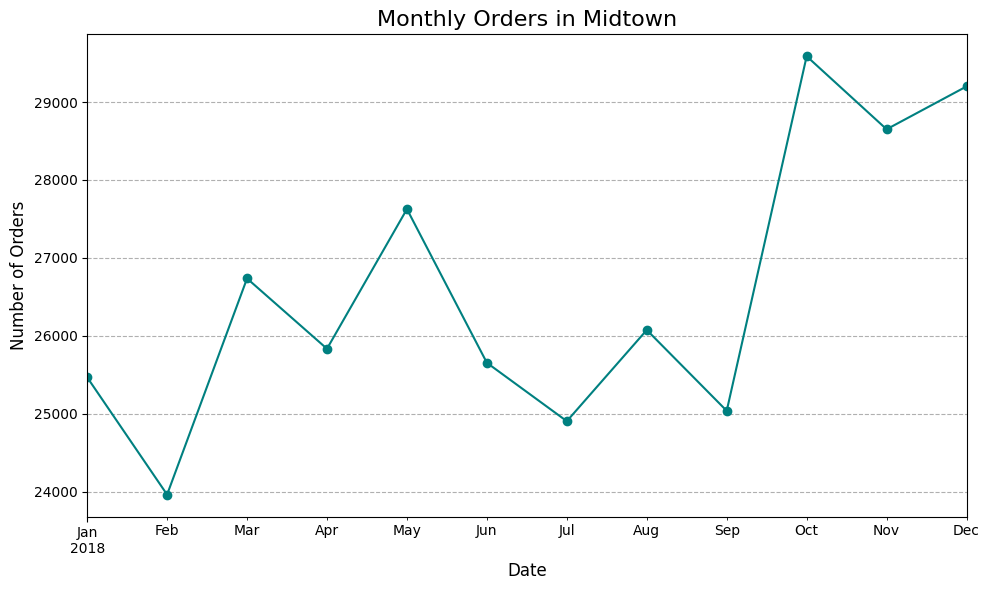

In [ ]:
# Filter for Midtown and group by month using the DATE column
df_midtown_monthly = (
    df_orders_7[df_orders_7['RESTAURANT_NAME'] == 'Midtown']
    .groupby(pd.Grouper(key='DATE', freq='M'))  # Use the cleaned 'Date' column
    .size()
)

# Plot the results
df_midtown_monthly.plot(figsize=(10, 6), marker='o', linestyle='-', color='teal')

plt.title("Monthly Orders in Midtown", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

<ipython-input-35-eda6ea9a83df>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='DATE', freq='M'))  # Use the cleaned 'Date' column


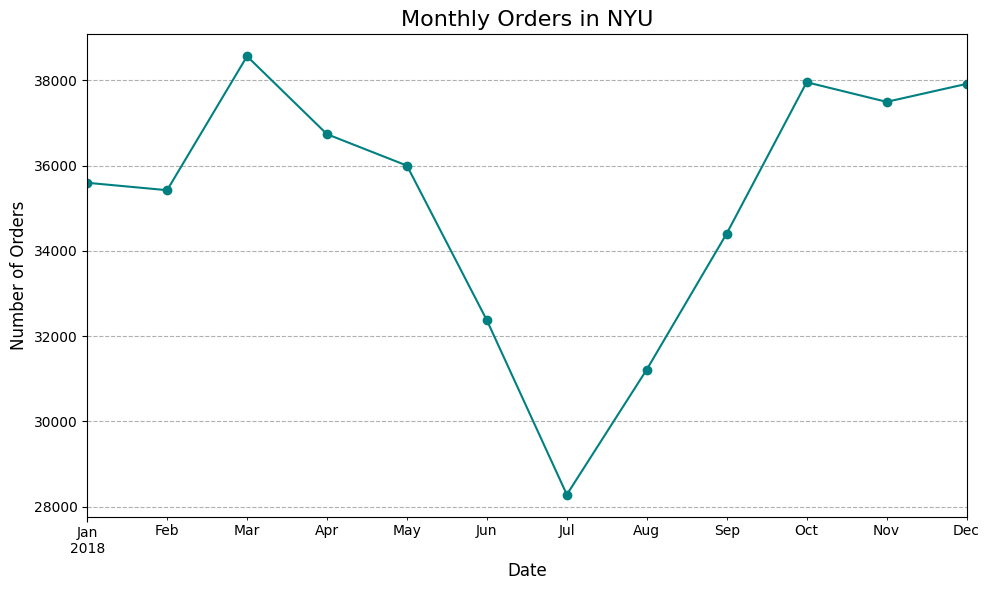

In [ ]:
# Filter for Midtown and group by month using the DATE column
df_midtown_monthly = (
    df_orders_7[df_orders_7['RESTAURANT_NAME'] == 'NYU']
    .groupby(pd.Grouper(key='DATE', freq='M'))  # Use the cleaned 'Date' column
    .size()
)

# Plot the results
df_midtown_monthly.plot(figsize=(10, 6), marker='o', linestyle='-', color='teal')

plt.title("Monthly Orders in NYU", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

###4.1.3 INSIGHTS

In Midtown, monthly orders clearly fall in July, the lowest point, and reach their peaks in March and from October to December, reflecting the end of summer vacation and the holiday season. The daily chart shows a consistent pattern of weekday peaks and weekend declines, accentuated by the summer dip. Aggregating all locations by month confirms the same seasonality: a low point in July and two annual rebounds. Finally, NYU replicates this pattern but with a steeper decline in the summer and a slower recovery, suggesting a focus on summer promotions there and strengthening resources in Midtown for the fall.

##4.2 SALES BY HOUR OF THE DAY

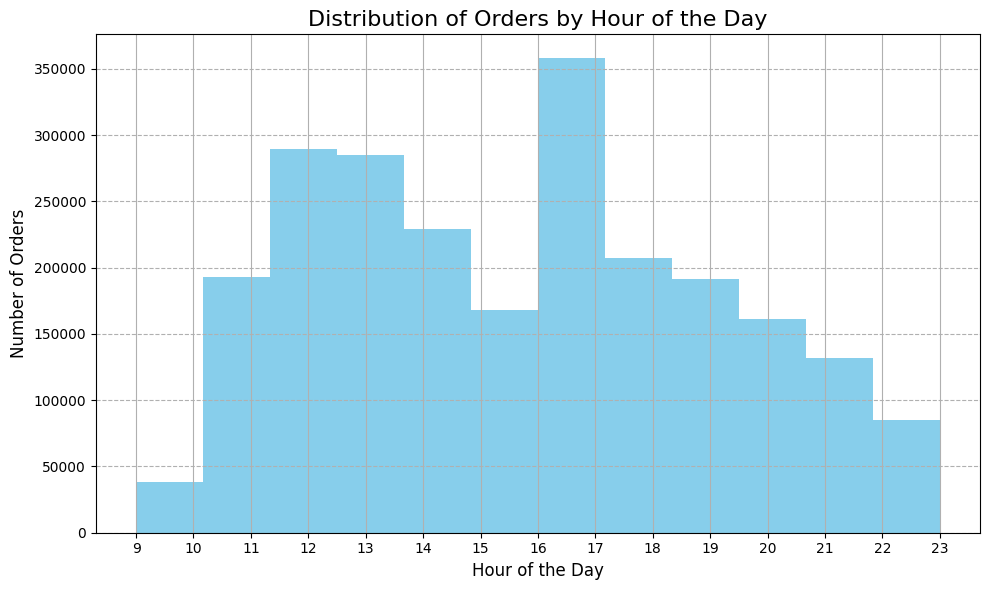

In [ ]:
# prompt: HELP ME GENERATE A HISTOGRAM FOR EACH HOUR OF SALES

# Extract the hour from the 'TIME' column
df_orders_7['HOUR'] = df_orders_7['TIME'].dt.hour

# Generate a histogram for the 'HOUR' column
plt.figure(figsize=(10, 6))
df_orders_7['HOUR'].hist(bins=12, ec='black', color='skyblue')

plt.title("Distribution of Orders by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(range(9, 24)) # Set x-ticks to show each hour
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
df_orders_7['TIME'].describe()

,TIME
count,2338119
mean,1900-01-01 16:08:35.511744256
min,1900-01-01 09:58:14
25%,1900-01-01 13:12:43
50%,1900-01-01 15:47:58
75%,1900-01-01 18:55:42
max,1900-01-01 23:03:00


###4.2.1 INSIGHTS

Most of the sales are made at 16:00, with the least common hour being from 9am to 10am. This is a powerfull insight as it may bring ideas such as a "Happy hour" to increase sales at slow times of the day

#5. MOST POPULAR ITEMS AND ORDER TYPE FOR EACH RESTAURANT

##5.1 MOST POPULAR ITEMS PER RESTAURANT

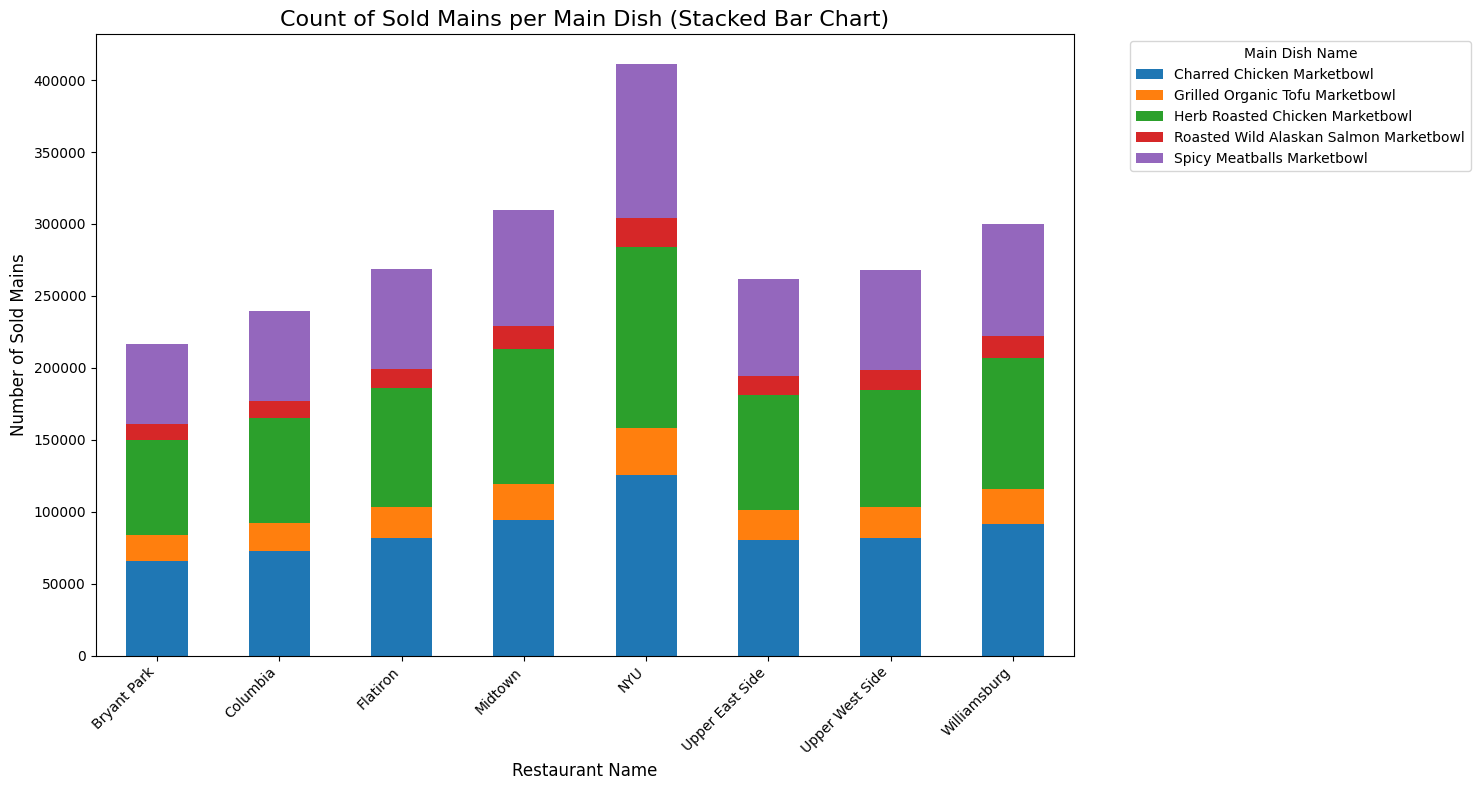

In [ ]:
# prompt: I WANT A VISUALIZATION SHOWING THE COUNT OF SOLD MAINS FOR EACH RESTAURANT, USE A STACKED BAR CHART

# Group by main dish and then by restaurant, and count the occurrences
main_dish_counts = df_orders_7.groupby(['MAIN_NAME', 'RESTAURANT_NAME']).size().reset_index(name='Count')

# Pivot the data to have main dishes as columns and restaurants as index
pivot_main_dishes_restaurants = main_dish_counts.pivot(index='RESTAURANT_NAME', columns='MAIN_NAME', values='Count').fillna(0)

# Plot the stacked bar chart
ax = pivot_main_dishes_restaurants.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title("Count of Sold Mains per Main Dish (Stacked Bar Chart)", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Number of Sold Mains", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Main Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###5.1.1 INSIGHTS

Among the top five restaurants, the Herb Roasted Chicken Marketbowl and the Charred Chicken Marketbowl easily dominate sales volume, followed closely by the Spicy Meatballs Marketbowl. NYU leads in each of these categories, while Flatiron and Upper West Side have the lowest sales counts. The much smaller presence of Roasted Wild Alaskan Salmon and Grilled Organic Tofu indicates a clear opportunity to design promotions or combos that boost these higher-margin options while maintaining consistency across all locations.

##5.2 ORDER COUNT BY TYPE

###5.2.1 ORDER TYPE (TOTAL ORDERS)

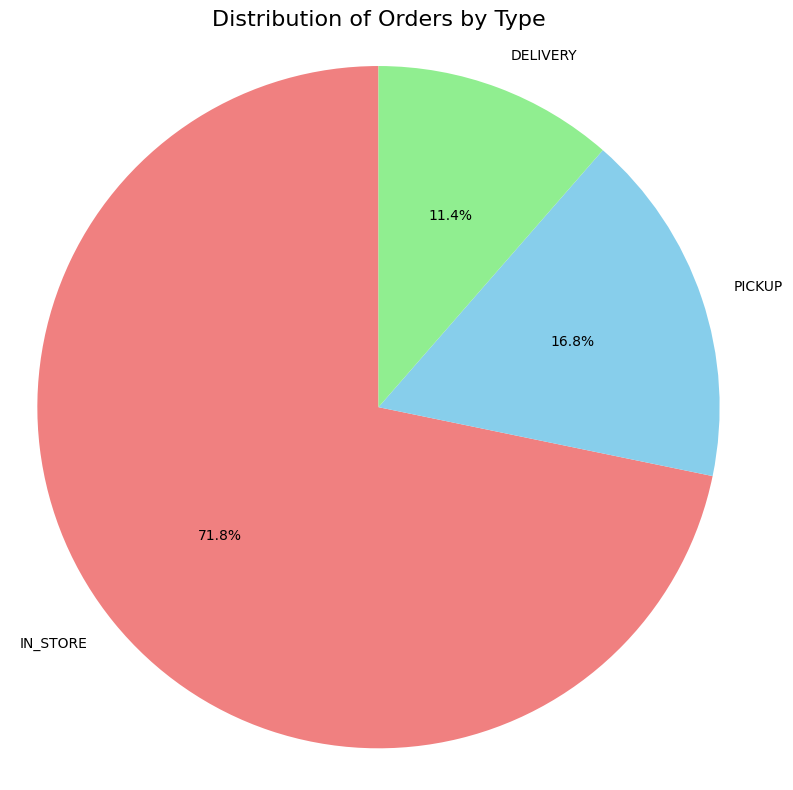

In [ ]:
# Count the occurrences of each order type
order_type_counts = df_orders_7['TYPE'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
order_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen'])

plt.title("Distribution of Orders by Type", fontsize=16)
plt.ylabel('')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
order_type_counts

,count
TYPE,
IN_STORE,1677905
PICKUP,393175
DELIVERY,267039


###5.2.2 ORDER TYPE BY RESTAURANT

In [ ]:

# Count the number of each order type for each restaurant
order_type_by_restaurant = df_orders_7.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(fill_value=0)

# Display the table
print("Order Type Distribution by Restaurant:")
order_type_by_restaurant

Order Type Distribution by Restaurant:


TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15278,167995,39495
Columbia,24745,178744,42007
Flatiron,28271,200508,47520
Midtown,21950,239985,56801
NYU,42422,308367,71166
Upper East Side,51030,176908,41420
Upper West Side,52204,180752,42416
Williamsburg,31139,224646,52350


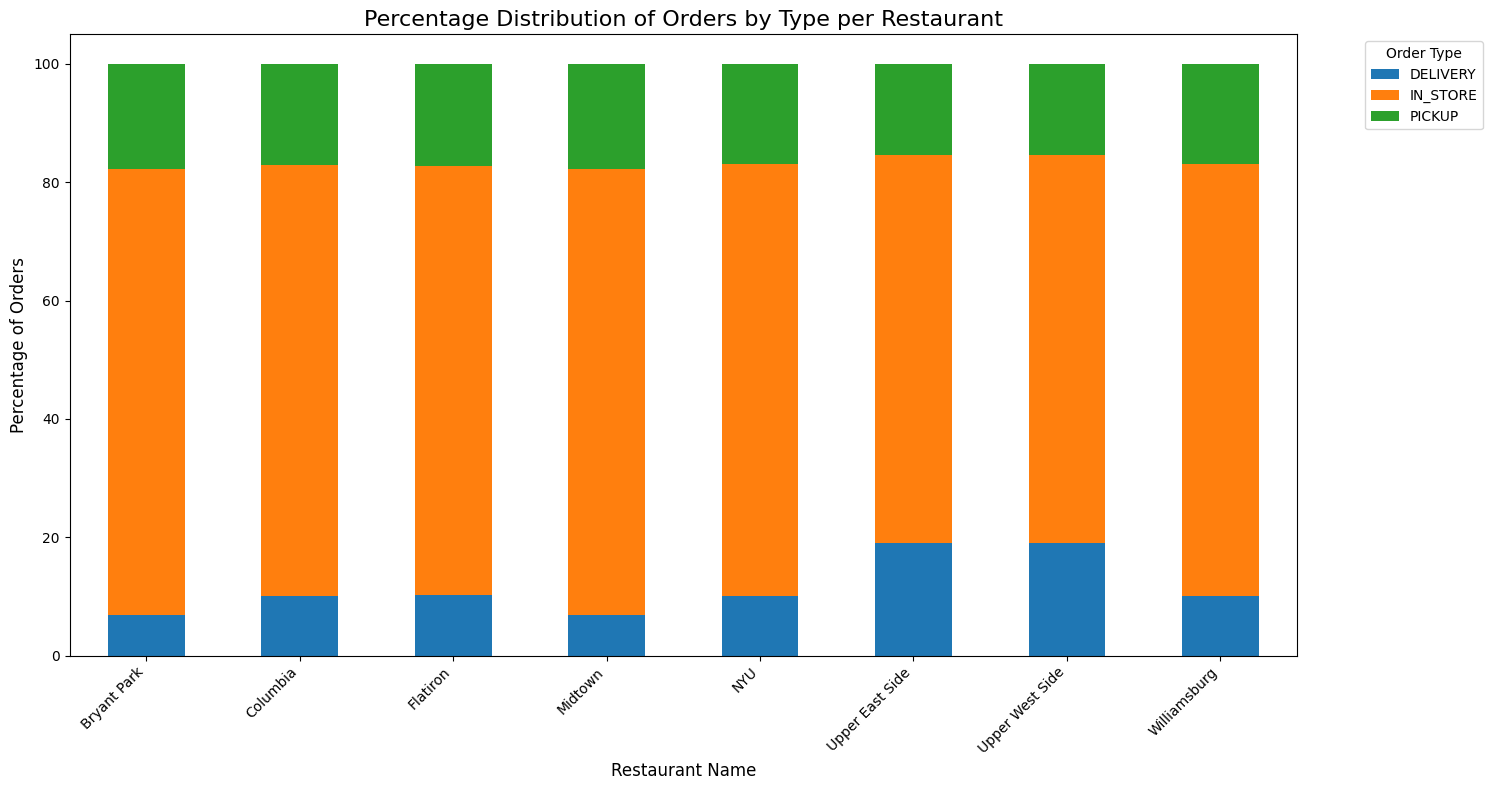

In [ ]:
# prompt: same chart but now as percentages of the total sales of each restaurants

# Calculate the percentage of each order type per restaurant
order_type_percentage_by_restaurant = order_type_by_restaurant.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart of percentages
ax = order_type_percentage_by_restaurant.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title("Percentage Distribution of Orders by Type per Restaurant", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Percentage of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###5.2.3 INSIGHTS

We can clearly appreciate that the vast majority of sales are made in-store. This rejects our early hypothesis that drinks were not being sold due to most orders being delivery or pickup. Since just 8% of sales have a drink, this reflects 2 possibilities: 1. The restaurant has a water fountain and customers do not buy drinks or 2. The data for drinks is not entered correctly.

#6. CONCLUSION AND RECOMMENDATIONS.

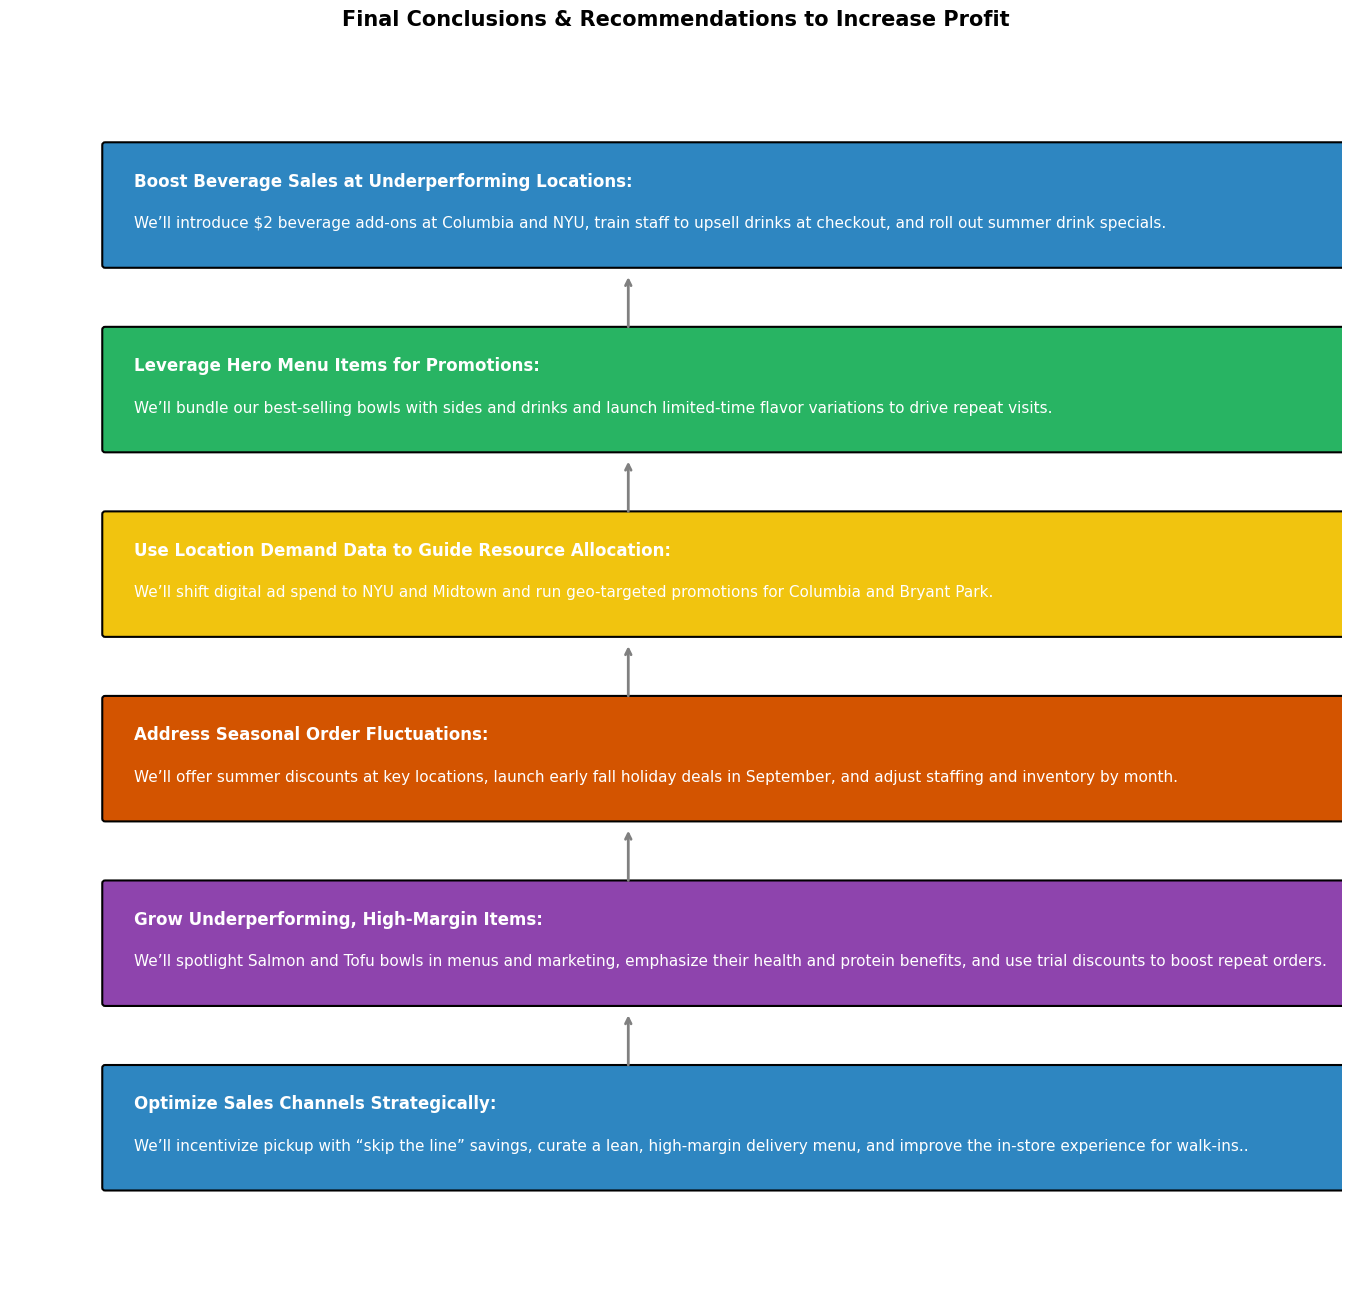

In [ ]:
import matplotlib.patches as patches

# Full recommendations
titles = [
    "Boost Beverage Sales at Underperforming Locations",
    "Leverage Hero Menu Items for Promotions",
    "Use Location Demand Data to Guide Resource Allocation",
    "Address Seasonal Order Fluctuations",
    "Grow Underperforming, High-Margin Items",
    "Optimize Sales Channels Strategically",
]

descriptions = [
    "We’ll introduce $2 beverage add-ons at Columbia and NYU, train staff to upsell drinks at checkout, and roll out summer drink specials.",
    "We’ll bundle our best-selling bowls with sides and drinks and launch limited-time flavor variations to drive repeat visits.",
    "We’ll shift digital ad spend to NYU and Midtown and run geo-targeted promotions for Columbia and Bryant Park.",
    "We’ll offer summer discounts at key locations, launch early fall holiday deals in September, and adjust staffing and inventory by month.",
    "We’ll spotlight Salmon and Tofu bowls in menus and marketing, emphasize their health and protein benefits, and use trial discounts to boost repeat orders.",
    "We’ll incentivize pickup with “skip the line” savings, curate a lean, high-margin delivery menu, and improve the in-store experience for walk-ins..",
]

colors = ['#2E86C1', '#28B463', '#F1C40F', '#D35400', '#8E44AD', '#2E86C1' ]

# Plot setup
fig, ax = plt.subplots(figsize=(15, 13))
ax.axis('off')

# SmartArt-style layout with full text
box_width = 13.5
box_height = 1.3
spacing = 2
start_y = 11

for i, (title, desc, color) in enumerate(zip(titles, descriptions, colors)):
    y = start_y - i * spacing

    # Rectangle with title and full description
    rect = patches.FancyBboxPatch(
        (1, y), box_width, box_height,
        boxstyle="round,pad=0.03", linewidth=1.5,
        edgecolor='black', facecolor=color
    )
    ax.add_patch(rect)

    # Title
    ax.text(1.3, y + 0.85, f"{title}:", fontsize=12, weight='bold', color='white')

    # Description
    ax.text(1.3, y + 0.4, desc, fontsize=11, color='white', wrap=True)

    # Draw arrow to next box
    if i < len(titles) - 1:
        ax.annotate(
            '', xy=(6.5, y - 0.1), xytext=(6.5, y - spacing + 1.3),
            arrowprops=dict(arrowstyle="->", lw=2, color='gray')
        )

plt.xlim(0, 14)
plt.ylim(0, 13.5)
plt.title("Final Conclusions & Recommendations to Increase Profit", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()